<a href="https://colab.research.google.com/github/phuocthok18/CNN_CamXuc/blob/main/CNN_CamXuc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


link data: https://drive.google.com/drive/folders/1Zb2qlo5O2qqrLgXBymFqaPZSVPClZrw2?usp=sharing

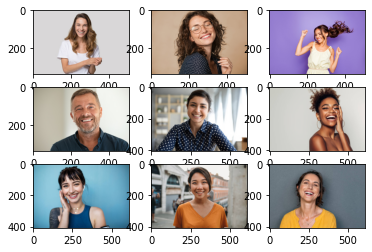

In [2]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

folder= '/content/drive/MyDrive/CamXuc/'
for i in range(9):
  plt.subplot(330+i+1)
  filename = folder+'HanhPhuc'+str(i+1)+'.jpg'
  image = imread(filename)
  plt.imshow(image)
plt.show()

In [3]:
from os import listdir
from numpy import asarray
from numpy import save
from keras.preprocessing.image import load_img, img_to_array

folder= '/content/drive/MyDrive/CamXuc/'

photos, labels = list(), list()
for file in listdir(folder):
  if file.startswith('Buon'):
    output = 0
    photo = load_img(folder+file,target_size=(150,150))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('Ghetom'):
    output = 1
    photo = load_img(folder+file,target_size=(150,150))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('HanhPhuc'):
    output = 2
    photo = load_img(folder+file,target_size=(150,150))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('Sohai'):
    output = 2
    photo = load_img(folder+file,target_size=(150,150))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

photos = asarray(photos)
labels = asarray(labels)
print(photos.shape,labels.shape)

save('CamXuc_photos.npy', photos)
save('CamXuc_labels.npy', labels)

(39, 150, 150, 3) (39,)


In [4]:
from keras.models import Sequential
from keras.layers import Dense, Activation, BatchNormalization, Dropout, Conv2D, MaxPooling2D, Flatten # BatchNormalization: để dùng GPU ko lỗi
from tensorflow.keras.optimizers import SGD

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(4, activation='softmax'))
model.summary()
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(photos, labels, epochs=50, verbose=1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 82944)             0         
                                                                 
 dense (Dense)               (None, 64)                5

In [6]:
model.save('NhanDangCX.h5')

In [8]:
from keras.models import load_model
models=load_model('NhanDangCX.h5')

Cam xuc: HanhPhuc


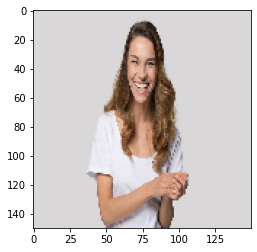

In [11]:
from keras.saving.model_config import model_from_json
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np
img = load_img('/content/drive/MyDrive/CamXuc/HanhPhuc1.jpg', target_size=(150,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,150,150,3) 
img = img.astype('float32')
img = img/255
np.argmax(models.predict(img), axis=1)
classes = ['Buon', 'Ghetom', 'HanhPhuc', 'Sohai']
print('Cam xuc:', classes[np.argmax(models.predict(img))])
# if np.argmax(models.predict(img)) == 0:
#    print("Buoi")
# if np.argmax(models.predict(img)) == 1:
#    print("Cam")
# if np.argmax(models.predict(img)) == 2:
#    print("Co

Cam xuc: Buon


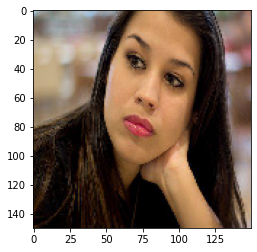

In [12]:
img = load_img('/content/drive/MyDrive/CamXuc/Buon4.jpg', target_size=(150,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,150,150,3) 
img = img.astype('float32')
img = img/255
np.argmax(models.predict(img), axis=1)
classes = ['Buon', 'Ghetom', 'HanhPhuc', 'Sohai']
print('Cam xuc:', classes[np.argmax(models.predict(img))])

Cam xuc: HanhPhuc


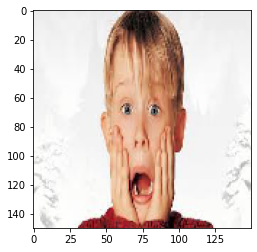

In [33]:
img = load_img('/content/drive/MyDrive/CamXuc/Sohai4.jpg', target_size=(150,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,150,150,3) 
img = img.astype('float32')
img = img/255
np.argmax(models.predict(img), axis=1)
classes = ['Buon', 'Ghetom', 'HanhPhuc', 'Sohai']
print('Cam xuc:', classes[np.argmax(models.predict(img))])

In [24]:
from google.colab import files
img = files.upload()

Saving Omg.jpg to Omg.jpg


Cam xuc: Ghetom


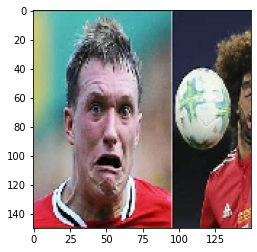

In [25]:
# anh ko co trong tap train
img = load_img('Omg.jpg', target_size=(150,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,150,150,3) 
img = img.astype('float32')
img = img/255
np.argmax(models.predict(img), axis=1)
classes = ['Buon', 'Ghetom', 'HanhPhuc', 'Sohai']
print('Cam xuc:', classes[np.argmax(models.predict(img))])